# Importing all the necessory libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
Genderdf=pd.read_csv('gender_submission.csv')
Genderdf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [102]:
Test_df=pd.read_csv('test.csv')
Test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
Train_df=pd.read_csv('train.csv')
Train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking the Null values and removing them.

In [104]:
Train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age contains 20 percent of data as Unknown.

678 people dont have cabin number, Only those in higher socio-economic class have a cabin

0.2 percent of people doent have a Embarked feature.

# Creating New Columns based on the given Data

## Making a new column "Prefix" from the name.

In [105]:
Train_df.loc[0,'Name']

'Braund, Mr. Owen Harris'

In [106]:
Train_df['Name'].str.split(',')[0][1].split('.')[0]

' Mr'

In [107]:
Train_df['Prefix']=pd.Series(dtype= 'object')

In [108]:
for i in range(len(Train_df['Name'])):
    Train_df.loc[i,'Prefix']=Train_df['Name'].str.split(',')[i][1].split('.')[0]

In [109]:
Train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [110]:
Train_df['Prefix'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

## Making Deck column from Cabin

In [111]:
Train_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [112]:
Train_df['Deck']= Train_df['Cabin'].str[0]

In [113]:
Train_df.loc[Train_df['Deck'].isna(),'Deck']='Unknown'

In [114]:
Train_df['Deck'].value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Deck, dtype: int64

In [115]:
for i in range(0,891):
    if Train_df.loc[i,'Deck']=='Unknown':
        Train_df.loc[i,'havecabin']=0
    else:
        Train_df.loc[i,'havecabin']=1
Train_df['havecabin']=Train_df['havecabin'].astype('int64')

## Making a column on total family members who are travelling with them

In [116]:
Train_df['Familymem']=Train_df['Parch']+Train_df['SibSp']

In [117]:
Train_df['Familymem'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Familymem, dtype: int64

In [118]:
Train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [119]:
Train_df[Train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck,havecabin,Familymem
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,B,1,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,B,1,0


In [120]:
child=(Train_df['Age']<18)
Train_df['Who']=Train_df['Sex']
Train_df.loc[child,'Who']='child'

In [121]:
Train_df['Age'].astype(float)
for i in range(0,891):
    if Train_df.loc[i,'Age']<2:
        Train_df.loc[i,'AgeGrp']='infant'
    elif Train_df.loc[i,'Age']<18:
        Train_df.loc[i,'AgeGrp']='child'
    elif Train_df.loc[i,'Age']<29:
        Train_df.loc[i,'AgeGrp']='Young'
    elif Train_df.loc[i,'Age']<65:
        Train_df.loc[i,'AgeGrp']='Adult'
    elif Train_df.loc[i,'Age']>=65:
        Train_df.loc[i,'AgeGrp']='Senior'
    else:
        Train_df.loc[i,'AgeGrp']='Unknown'
Train_df['AgeGrp'].value_counts()

Adult      339
Young      251
Unknown    177
child       99
infant      14
Senior      11
Name: AgeGrp, dtype: int64

# Data visualization

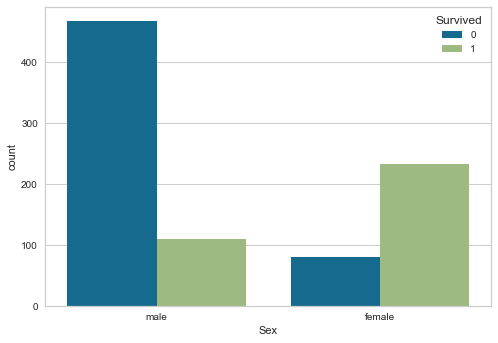

In [122]:
ax=sns.countplot(x='Sex',hue='Survived',data=Train_df)

In [123]:
surv=(Train_df['Survived']==1)
print('Percentage of Female Survived: ',(Train_df[surv]['Sex'].value_counts()['female'])/(Train_df['Sex'].value_counts()['female'])*100)
print('Percentage of Male Survived: ',(Train_df[surv]['Sex'].value_counts()['male'])/(Train_df['Sex'].value_counts()['male'])*100)

Percentage of Female Survived:  74.20382165605095
Percentage of Male Survived:  18.890814558058924


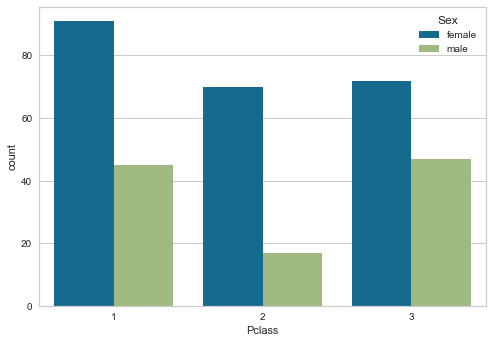

In [124]:
ax = sns.countplot(x="Pclass", hue="Sex", data=Train_df[Train_df['Survived']==1])

In [125]:
surv=(Train_df['Survived']==1)
fem=(Train_df['Sex']=='female')
print('Percentage of 1st Class Survived: ',(Train_df[surv]['Pclass'].value_counts()[1])/(Train_df['Pclass'].value_counts()[1])*100)
print('Percentage of 2nd Class Survived: ',(Train_df[surv]['Pclass'].value_counts()[2])/(Train_df['Pclass'].value_counts()[2])*100)
print('Percentage of 3rd Class Survived: ',(Train_df[surv]['Pclass'].value_counts()[3])/(Train_df['Pclass'].value_counts()[3])*100)
print('Percentage of 1st Class female Survived: ',(Train_df[surv&fem]['Pclass'].value_counts()[1])/(Train_df[fem]['Pclass'].value_counts()[1])*100)
print('Percentage of 2nd Class female Survived: ',(Train_df[surv&fem]['Pclass'].value_counts()[2])/(Train_df[fem]['Pclass'].value_counts()[2])*100)
print('Percentage of 3rd Class female Survived: ',(Train_df[surv&fem]['Pclass'].value_counts()[3])/(Train_df[fem]['Pclass'].value_counts()[3])*100)

Percentage of 1st Class Survived:  62.96296296296296
Percentage of 2nd Class Survived:  47.28260869565217
Percentage of 3rd Class Survived:  24.236252545824847
Percentage of 1st Class female Survived:  96.80851063829788
Percentage of 2nd Class female Survived:  92.10526315789474
Percentage of 3rd Class female Survived:  50.0


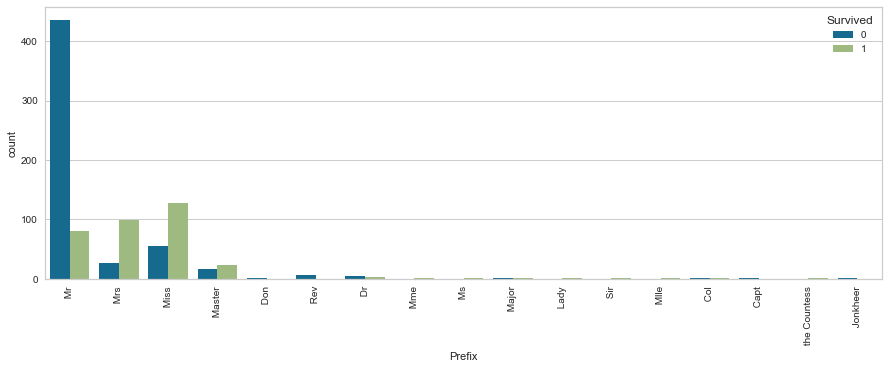

In [126]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Prefix",hue='Survived', data=Train_df)
plt.xticks(label='Prefix',rotation=90)
plt.show()

<AxesSubplot:xlabel='havecabin', ylabel='count'>

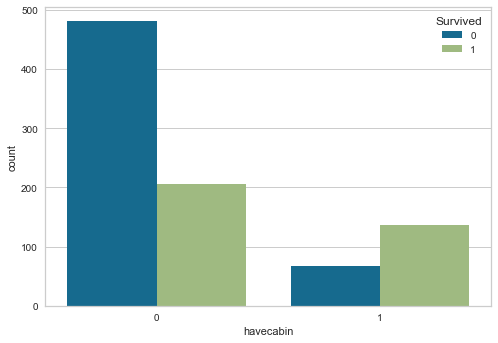

In [127]:
sns.countplot(x="havecabin", hue="Survived", data=Train_df)

In [128]:
surv=(Train_df['Survived']==1)
cabin=(Train_df['havecabin']==1)
print('Percentage of people having a cabin Survived: ',(Train_df[surv]['havecabin'].value_counts()[1])/(Train_df['havecabin'].value_counts()[1])*100)

Percentage of people having a cabin Survived:  66.66666666666666


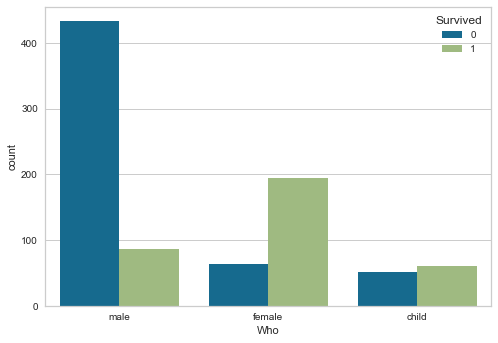

In [129]:
ax=sns.countplot(x='Who',hue='Survived',data=Train_df)

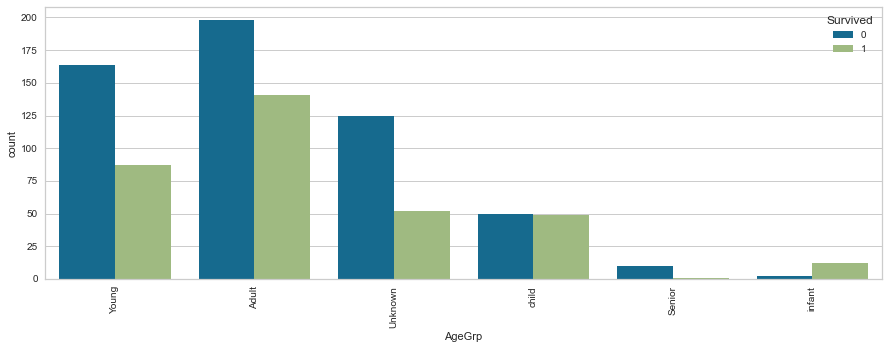

In [130]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="AgeGrp",hue='Survived', data=Train_df)
plt.xticks(label='AgeGrp',rotation=90)
plt.show()

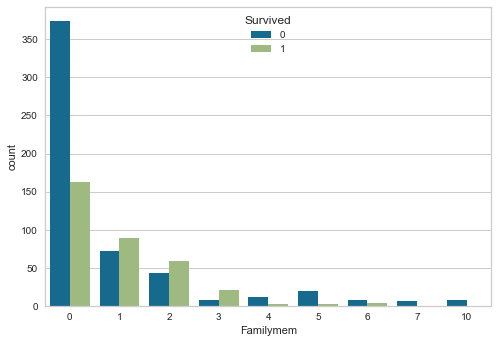

In [131]:
ax=sns.countplot(x='Familymem',hue='Survived',data=Train_df)

Those who with 1-3 family members are more survived.

# Creating Dataframe and arranging Data

In [132]:
New_df=Train_df[['PassengerId','AgeGrp','Pclass','Sex','SibSp','Parch','Embarked','havecabin','Survived','Fare','Prefix']]
New_df.head()

,PassengerId,AgeGrp,Pclass,Sex,SibSp,Parch,Embarked,havecabin,Survived,Fare,Prefix
0,1,Young,3,male,1,0,S,0,0,7.2500,Mr
1,2,Adult,1,female,1,0,C,1,1,71.2833,Mrs
2,3,Young,3,female,0,0,S,0,1,7.9250,Miss
3,4,Adult,1,female,1,0,S,1,1,53.1000,Mrs
4,5,Adult,3,male,0,0,S,0,0,8.0500,Mr


In [133]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
New_df.loc[:,'AgeGrp']=pd.Series(le.fit_transform(New_df['AgeGrp']))
New_df.loc[:,'Sex']=pd.Series(le.fit_transform(New_df['Sex']))
New_df.loc[:,'Embarked']=pd.Series(le.fit_transform(New_df['Embarked']))
New_df.loc[:,'Prefix']=pd.Series(le.fit_transform(New_df['Prefix']))

In [134]:
New_df

,PassengerId,AgeGrp,Pclass,Sex,SibSp,Parch,Embarked,havecabin,Survived,Fare,Prefix
0,1,3,3,1,1,0,2,0,0,7.2500,11
1,2,0,1,0,1,0,0,1,1,71.2833,12
2,3,3,3,0,0,0,2,0,1,7.9250,8
3,4,0,1,0,1,0,2,1,1,53.1000,12
4,5,0,3,1,0,0,2,0,0,8.0500,11
...,...,...,...,...,...,...,...,...,...,...,...
886,887,3,2,1,0,0,2,0,0,13.0000,14
887,888,3,1,0,0,0,2,1,1,30.0000,8
888,889,2,3,0,1,2,2,0,0,23.4500,8
889,890,3,1,1,0,0,0,1,1,30.0000,11


<AxesSubplot:>

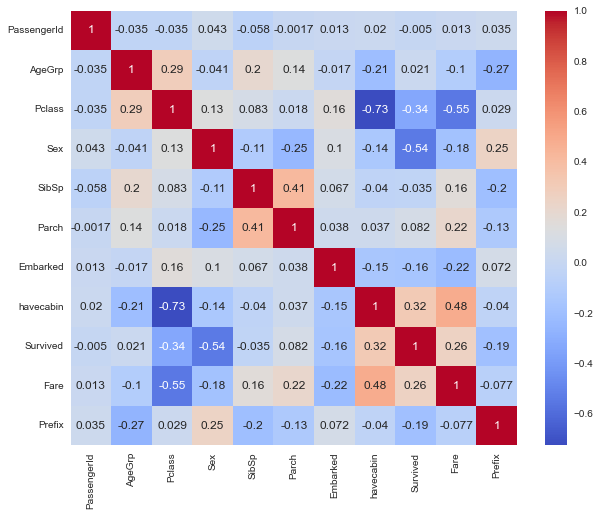

In [135]:
plt.figure(figsize=(10,8))
sns.heatmap(New_df.corr(),cmap= 'coolwarm',annot=True)

# Train,Test Split

In [136]:
from sklearn.model_selection import train_test_split

X = New_df.drop(['Survived', 'PassengerId'], axis=1)
y = New_df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 60)

# Testing Different Models

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

73.74


In [138]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

72.63


In [139]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

75.98


In [140]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

80.45


In [141]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

73.18


In [142]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

63.69


In [143]:
from sklearn.ensemble import AdaBoostClassifier
clf = RandomForestClassifier()
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

from sklearn import metrics
acc_adarf = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_adarf)


77.09


In [144]:
clf = DecisionTreeClassifier()
abc = AdaBoostClassifier(base_estimator=clf,n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

from sklearn import metrics
acc_adadt = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_adadt)

77.65


In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
acc_gboost = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gboost)

79.33


In [146]:
import xgboost as xgb
model =xgb.XGBClassifier( 
                      learning_rate=0.06,  
                      colsample_bytree = 0.6,
                      subsample = 0.8, 
                      n_estimators=200,                       
                      max_depth=3, 
                      gamma=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_Xgboost = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_Xgboost)

[01:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
80.45


In [147]:
accu_df=pd.DataFrame({
    'Model': ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 
              'RandomForestClassifier', 'GaussianNB', 'svm', 'AdaBoostClassifier RandomForest', 
              'AdaBoostClassifier Decision Tree', 'GradientBoostingClassifier', 'xgboost'],
    'Score': [acc_logreg, acc_knn, acc_decisiontree, 
              acc_randomforest, acc_gaussian, acc_svc, acc_adarf,
              acc_adadt, acc_gboost,acc_Xgboost]})
accu_df.sort_values(by='Score',ascending=False)

,Model,Score
3,RandomForestClassifier,80.45
9,xgboost,80.45
8,GradientBoostingClassifier,79.33
7,AdaBoostClassifier Decision Tree,77.65
6,AdaBoostClassifier RandomForest,77.09
2,DecisionTreeClassifier,75.98
0,LogisticRegression,73.74
4,GaussianNB,73.18
1,KNeighborsClassifier,72.63
5,svm,63.69
